In [1]:
#Import libraries
import numpy as np
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt



In [3]:
class GaussianBasis(BaseEstimator,TransformerMixin):
    """
    The class creates a gaussian basis object. Sample space is explored 
    based on the selected number of points or centers.
    Gaussian distributions are modelled around these points for each data point where the overall variance is kept the same.
    The Gaussian distributions are summed to generate a new basis using the sample data.
    """
    def __init__(self,N,width_factor=1.0) -> None:
        
        self.width_factor=width_factor #standard deviation
        self.N=N #number of samples

    @staticmethod
    def gaussian_basis(X,y,width,axis=None):
        
        norm=(X-y)/width
        gs=np.exp(-0.5 * np.sum(norm ** 2, axis))
        return gs

    def fit(self,X,y=None):
        
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self,X):

        return self.gaussian_basis(X[:,:,np.newaxis], self.centers_, self.width_, axis=1)



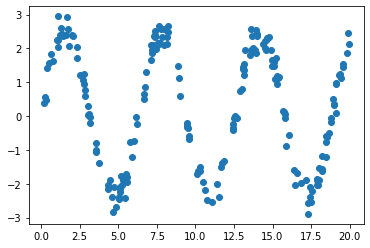

In [168]:
               
# Generate test data        

X =20* np.random.rand(200)
y = np.sin(X)*2.5+ 0.25*np.random.randn(200) #add noise

plt.scatter(X,y)
plt.show()

#Sample function region
Xfit=np.linspace(0,20,500)

In [139]:
#Test Gaussian basis function
gs=GaussianBasis(10,2.5)

t=gs.fit_transform(X[:,np.newaxis])
print(t.shape)


(200, 10)


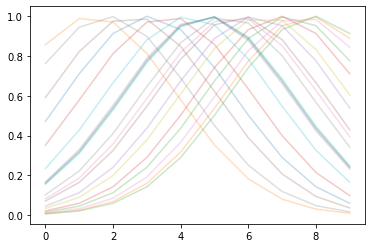

In [169]:

#Plot different gaussian distributions
for i in range(0,len(t),10):
    plt.plot(t[i,:],alpha=0.25)
plt.show()


In [171]:
#Create a pipeline for linear regression                  
model=make_pipeline(GaussianBasis(12,2.5),LinearRegression())

model.fit(X[:,np.newaxis],y)

ypred=model.predict(Xfit[:,np.newaxis])


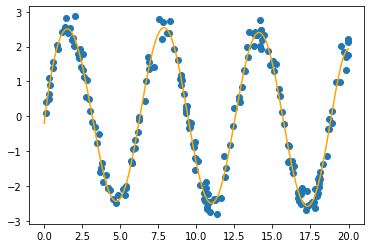

In [147]:
#Visualise basis function predictions
plt.scatter(X,y)
plt.plot(Xfit,ypred,color='orange')
plt.show()

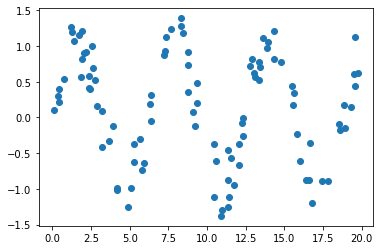

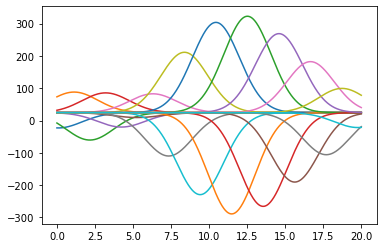

In [177]:
#Explore individual Gaussian functions

rng = np.random.RandomState(0)
X = 20 * rng.rand(100)
y = np.sin(X) + 0.25 * rng.randn(100)

N=20

xfit = np.linspace(0, 20, 1000)

plt.scatter(X,y)
plt.show()

model = make_pipeline(GaussianBasis(N, 1.5),LinearRegression())
model.fit(X[:, np.newaxis], y)
ypred = model.predict(xfit[:, np.newaxis])

gf = model.named_steps['gaussianbasis']
lm = model.named_steps['linearregression']

ymax=0
for i in range(N):
    #Prepare selection range to predict a specific step
    select = np.zeros(N)
    select[i] = 1

    Xfit = gf.transform(xfit[:, np.newaxis])*select
    
    yfit = lm.predict(Xfit)
    
    plt.plot(xfit, yfit)
    #plt.fill_between(xfit, yfit.min(), yfit, color='lightblue', alpha=0.2)

plt.show()

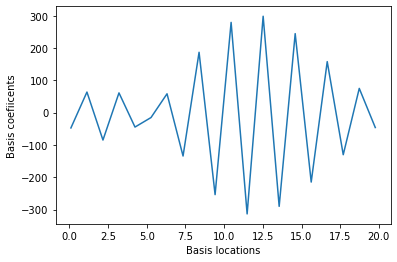

In [179]:

#Visualise model basis coeficients to assess overfitting
plt.plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
plt.xlabel('Basis locations')
plt.ylabel('Basis coefiicents')
plt.show()
# %%